<a href="https://colab.research.google.com/github/htuneieisanAnalyst/DS-Journey/blob/main/EDA_and_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis
I'll examine the dataset to understand its structure, identify missing values, and get some basic statistical summaries.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv('https://raw.githubusercontent.com/htuneieisanAnalyst/DS-Journey/main/Linear%20Regression.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.shape

(2938, 22)

In [ ]:
df.head(20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df.isnull()
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness 1-19 years                 34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64



```
# This is formatted as code
```

#Summary statistics
Basic statistics such as count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum for the numerical columns.

In [ ]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [41]:
#Drop null values
df.dropna()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


#Distribution of Key Variables
To understand the data better, let's plot the distribution of key variables like Life expectancy, Adult Mortality, GDP, and Schooling.

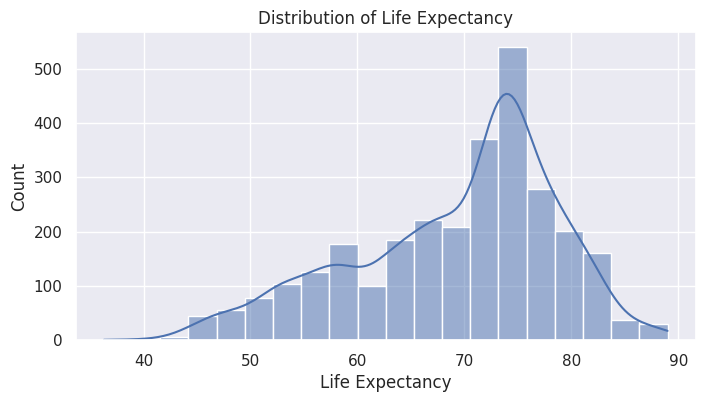

In [ ]:

# Set the aesthetic style of the plots
sns.set(style="darkgrid")

# Create a figure for the histogram
plt.figure(figsize=(8, 4))

# Plot the distribution of Life Expectancy
sns.histplot(df['Life expectancy'], bins=20, kde=True)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Count')

# Display the plot
plt.show()


#Conculsion on Distribution of Life expectancy
The distribution of life expectancy is right-skewed, with most countries having higher life expectancies around 70 years, indicating generally good health conditions and living standards. However, the range spans from about 40 to 90 years, highlighting significant disparities among countries. There are relatively few countries with very low (below 50 years) and very high (above 80 years) life expectancies, indicating some outliers. These findings suggest that while many countries enjoy high life expectancy, efforts should focus on improving health and socioeconomic conditions in countries with lower life expectancies to reduce these disparities.

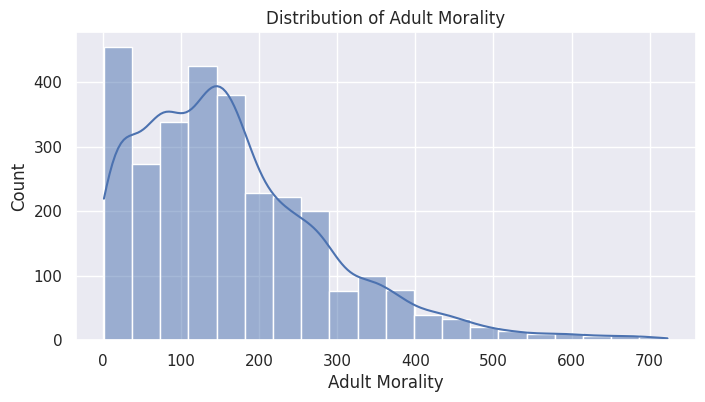

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="darkgrid")
# Create a figure for the histogram
plt.figure(figsize=(8, 4))
# Plot the distribution of Life Expectancy
sns.histplot(df['Adult Mortality'], bins=20, kde=True)
plt.title('Distribution of Adult Morality')
plt.xlabel('Adult Morality')
plt.ylabel('Count')
# Display the plot
plt.show()

#Conclusion on Distribution of Adult Morality Rate
The histogram of adult mortality rates is right-skewed, indicating that most values are concentrated at the lower end of the scale. This suggests that lower adult mortality is common, while higher mortality rates are less frequent but do occur.

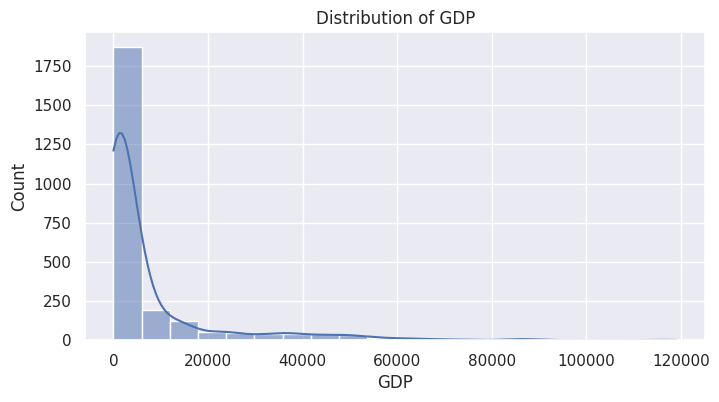

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="darkgrid")

# Create a figure for the histogram
plt.figure(figsize=(8, 4))
# Plot the distribution of Life Expectancy
sns.histplot(df['GDP'], bins=20, kde=True)
plt.title('Distribution of GDP')
plt.xlabel('GDP')
plt.ylabel('Count')

# Display the plot
plt.show()

#Conclusion on Distribution of GDP
The distribution plot of GDP reveals a highly right-skewed pattern, indicating that the majority of countries have relatively low GDPs, while a small number of countries exhibit exceptionally high GDP values. This skewness results in a long tail extending towards the higher end of the GDP spectrum, with a pronounced peak at the lower end. This suggests that a significant portion of the dataset comprises countries with low to moderate GDP levels. The presence of outliers with extremely high GDPs can significantly influence statistical analyses, potentially skewing the results.

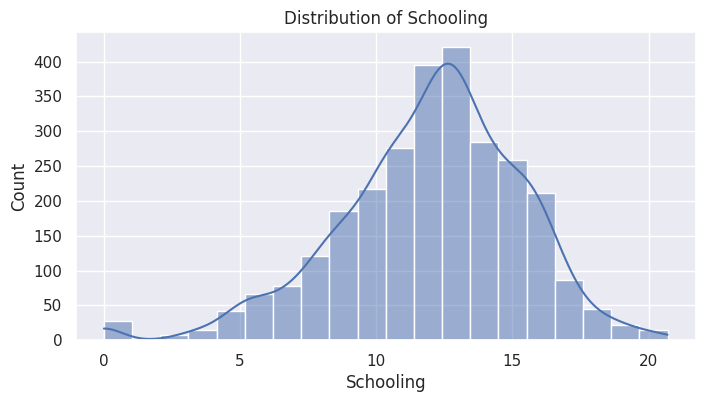

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="darkgrid")
# Create a figure for the histogram
plt.figure(figsize=(8, 4))
# Plot the distribution of Life Expectancy
sns.histplot(df['Schooling'], bins=20, kde=True)
plt.title('Distribution of Schooling')
plt.xlabel('Schooling')
plt.ylabel('Count')
# Display the plot
plt.show()

#Conclusion on Distribution of Schooling
The histogram of schooling shows that most people have between 10 and 15 years of education, with the highest number around 12 years. The distribution is bell-shaped, meaning that very few people have very low or very high years of schooling. The smooth curve (KDE) confirms that the majority of individuals fall in the middle range, with fewer people at the extremes. Overall, this indicates that most individuals have a moderate level of education.








In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
# Calculate correlation matrix for numerical columns
df[numerical_columns].corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.169623,-0.078861,-0.037415,-0.048168,0.031400,0.089398,-0.082493,0.108327,-0.042937,0.093820,0.081860,0.133853,-0.139741,0.093351,0.014951,-0.047592,-0.050627,0.236333,0.203471
Life expectancy,0.169623,1.000000,-0.696359,-0.196535,0.391598,0.381791,0.203771,-0.157574,0.559255,-0.222503,0.461574,0.207981,0.475418,-0.556457,0.430493,-0.019638,-0.472162,-0.466629,0.692483,0.715066
Adult Mortality,-0.078861,-0.696359,1.000000,0.078747,-0.190408,-0.242814,-0.138591,0.031174,-0.381449,0.094135,-0.272694,-0.110875,-0.273014,0.523727,-0.277053,-0.012501,0.299863,0.305366,-0.440062,-0.435108
infant deaths,-0.037415,-0.196535,0.078747,1.000000,-0.113812,-0.085612,-0.178783,0.501128,-0.227220,0.996629,-0.170674,-0.126564,-0.175156,0.025231,-0.107109,0.548522,0.465590,0.471228,-0.143663,-0.191757
Alcohol,-0.048168,0.391598,-0.190408,-0.113812,1.000000,0.339634,0.075447,-0.051055,0.318070,-0.110777,0.213744,0.294898,0.215242,-0.048650,0.318591,-0.030765,-0.416946,-0.405881,0.416099,0.497546
percentage expenditure,0.031400,0.381791,-0.242814,-0.085612,0.339634,1.000000,0.011679,-0.056596,0.228537,-0.087852,0.147203,0.173414,0.143570,-0.097857,0.888140,-0.024648,-0.251190,-0.252725,0.380374,0.388105
Hepatitis B,0.089398,0.203771,-0.138591,-0.178783,0.075447,0.011679,1.000000,-0.090317,0.134929,-0.184413,0.408519,0.050084,0.499958,-0.102405,0.062318,-0.109811,-0.105144,-0.108334,0.150992,0.171755
Measles,-0.082493,-0.157574,0.031174,0.501128,-0.051055,-0.056596,-0.090317,1.000000,-0.175925,0.507809,-0.136146,-0.104569,-0.141861,0.030899,-0.068060,0.236250,0.224742,0.221007,-0.115764,-0.122609
BMI,0.108327,0.559255,-0.381449,-0.227220,0.318070,0.228537,0.134929,-0.175925,1.000000,-0.237586,0.282156,0.231814,0.281059,-0.243548,0.276645,-0.063238,-0.532025,-0.538911,0.479837,0.508105
under-five deaths,-0.042937,-0.222503,0.094135,0.996629,-0.110777,-0.087852,-0.184413,0.507809,-0.237586,1.000000,-0.188703,-0.128269,-0.195651,0.038062,-0.110640,0.535864,0.467626,0.472099,-0.161533,-0.207111


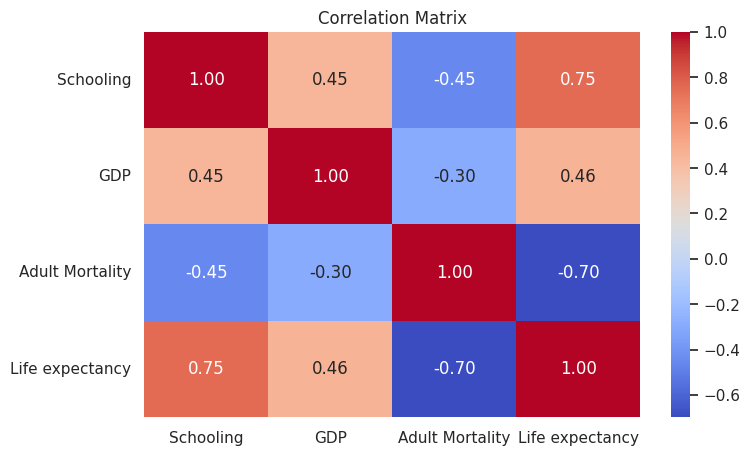

In [ ]:
# Select only the numeric columns for correlation
numeric_data = df[['Schooling', 'GDP', 'Adult Mortality', 'Life expectancy']]
# Correlation matrix
correlation_matrix = numeric_data.corr()
# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#Correlation Analysis
The correlation analysis reveals significant relationships among Schooling, GDP, Adult Mortality, and Life expectancy.There is a strong positive correlation (0.75) between Life expectancy and Schooling. This suggests that higher levels of schooling are associated with higher life expectancy.

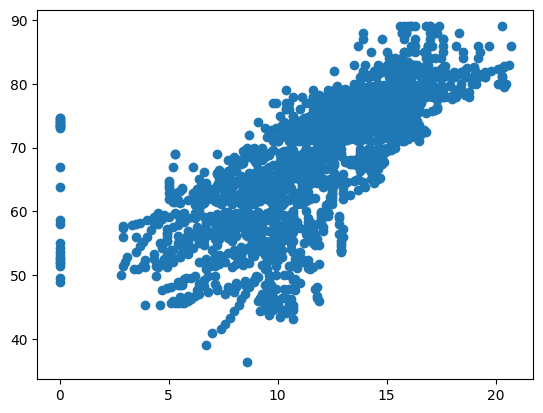

In [16]:
plt.scatter(df['Schooling'], df['Life expectancy'], marker='o')
plt.show()

In [33]:
X = df[['Schooling']]
Y = df['Life expectancy']
X.head()

,Schooling
0,10.1
1,10.0
2,9.9
3,9.8
4,9.5


In [18]:
Y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy, dtype: float64

In [44]:
print(X.isna().sum())
print(Y.isna().sum())


Schooling    163
dtype: int64
10


In [45]:
X = X.dropna()
Y = Y.dropna()

In [46]:
print(X.shape)
print(Y.shape)

(2775, 1)
(2928,)


In [48]:
# Assuming X and Y are pandas DataFrames or Series
# Find the minimum length
min_length = min(len(X), len(Y))

# Trim X and Y to the same length
X = X[:min_length]
Y = Y[:min_length]

# Check shapes again to ensure they are equal
print("Shapes after trimming:")
print(X.shape)
print(Y.shape)

# Fit the model
slr = LinearRegression()
slr.fit(X, Y)

Shapes after trimming:
(2775, 1)
(2775,)


LinearRegression()

In [49]:
YPredict = slr.predict(X)
YPredict[0:5]

array([68.83112536, 68.8035513 , 68.77597725, 68.7484032 , 68.66568104])

In [51]:
YPredict = slr.predict(X)
# Check the lengths
print("Length of YPredict:", len(YPredict))
print("Length of DataFrame index:", len(df.index))
# Trim YPredict or the DataFrame if necessary
min_length = min(len(YPredict), len(df.index))

# Ensure both are of the same length
YPredict = YPredict[:min_length]
df = df.iloc[:min_length]
# Insert predictions into the DataFrame
df.insert(4, "predict-life-expect", YPredict, True)

# Display the DataFrame
print(df.head())

Length of YPredict: 2775
Length of DataFrame index: 2938
       Country  Year      Status  Life expectancy  predict-life-expect  \
0  Afghanistan  2015  Developing             65.0            68.831125   
1  Afghanistan  2014  Developing             59.9            68.803551   
2  Afghanistan  2013  Developing             59.9            68.775977   
3  Afghanistan  2012  Developing             59.5            68.748403   
4  Afghanistan  2011  Developing             59.2            68.665681   

   Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0            263.0             62     0.01               71.279624   
1            271.0             64     0.01               73.523582   
2            268.0             66     0.01               73.219243   
3            272.0             69     0.01               78.184215   
4            275.0             71     0.01                7.097109   

   Hepatitis B  ...  Polio  Total expenditure  Diphtheria  HIV/AIDS  \
0     

In [52]:
df.head()

,Country,Year,Status,Life expectancy,predict-life-expect,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,68.831125,263.0,62,0.01,71.279624,65.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,68.803551,271.0,64,0.01,73.523582,62.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,68.775977,268.0,66,0.01,73.219243,64.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,68.748403,272.0,69,0.01,78.184215,67.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,68.665681,275.0,71,0.01,7.097109,68.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [55]:
import numpy as np  # Import numpy

# For a single value
single_value = 15
reshaped_value = np.array(single_value).reshape(1, -1)  # Reshape to 2D array

# Make prediction
single_prediction = slr.predict(reshaped_value)
print(single_prediction)


[70.18225396]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


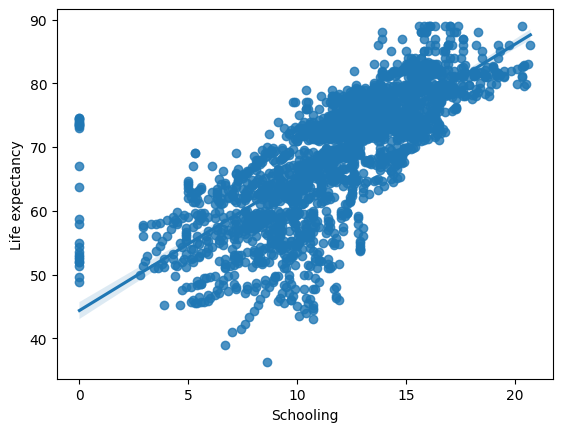

In [56]:
sns.regplot(x=df['Schooling'], y=df['Life expectancy'])
plt.show()